In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

## Reflect Tables into SQLALchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [9]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite", echo=False)

In [10]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [12]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [13]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [14]:
# Create our session (link) from Python to the DB
session = Session(bind=engine)

## Bonus Challenge Assignment: Temperature Analysis II

In [15]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, maximum, and average temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# For example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [22]:
# Use the function `calc_temps` to calculate the tmin, tavg, and tmax 
# for a year in the data set
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# For example
year_temps = calc_temps('2015-08-01', '2015-08-15')
year_temps

[(69.0, 78.48421052631579, 85.0)]

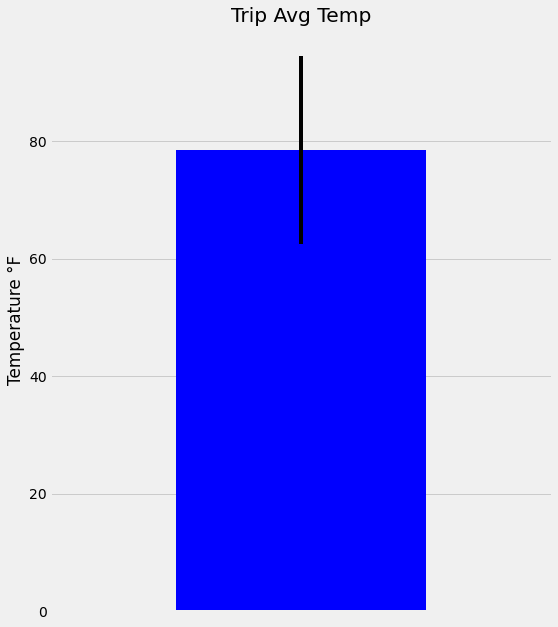

<Figure size 432x288 with 0 Axes>

In [23]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for bar height (y value)
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

# create the dataframe
year_temps_df = pd.DataFrame(year_temps, columns=["t_min", "t_avg", "t_max"])

plt.figure(figsize=(8,10))
ax=year_temps_df["t_avg"].plot.bar(yerr=(year_temps_df["t_max"]-year_temps_df["t_min"]), color="blue")
plt.title("Trip Avg Temp")
plt.ylabel("Temperature °F")
ax.axes.get_xaxis().set_visible(False)
plt.show()

# save the plot
plt.tight_layout()
plt.savefig("images/avg_temp.png")
plt.show()

### Daily Rainfall Average

In [24]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's 
# matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
start_date = "2014-08-01"
end_date = "2014-08-01"
sel = [func.count(Measurement.prcp), Measurement.station, Station.name, Station.latitude, Station.longitude, Station.elevation]
rainfall = session.query(*sel).filter(Measurement.station == Station.station).\
            group_by(Measurement.station).\
            filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).\
            order_by(func.count(Measurement.prcp).desc()).\
            all()

for x in rainfall:
    print(x)

(1, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5)
(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0)
(1, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9)
(1, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)
(1, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0)
(1, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6)
(1, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9)


In [25]:
# Use this function to calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()

# For example
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [34]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip
start_date = dt.date(2015, 8, 1)
end_date = dt.date(2015, 8, 15)

# use the start and end date to create a range of dates
trip_dates = pd.date_range(start_date, end_date)

# Use the start and end date to create a range of dates
#trip_dates = ["2015-08-01", "2015-08-02", "2015-08-03", "2015-08-04", "2015-08-05", "2015-08-06", "2015-08-07", "2015-08-08", 
#              "2015-08-09", "2015-08-10", "2015-08-11", "2015-08-12", "2015-08-13", "2015-08-14", "2015-08-15"]

# have to put it in the format before stirpping
trip_dates_list = [d.strftime("%m-%d") for d in trip_dates]
trip_dates_list

['08-01',
 '08-02',
 '08-03',
 '08-04',
 '08-05',
 '08-06',
 '08-07',
 '08-08',
 '08-09',
 '08-10',
 '08-11',
 '08-12',
 '08-13',
 '08-14',
 '08-15']

In [38]:
# Use the `daily_normals` function to calculate the normals for each date string 
# and append the results to a list called `trip daily normals`.
trip_daily_normals = [daily_normals(d)[0] for d in trip_dates_list]
print(trip_daily_normals)

[(67.0, 75.54, 83.0), (68.0, 75.60377358490567, 84.0), (70.0, 76.61111111111111, 85.0), (69.0, 76.71153846153847, 84.0), (69.0, 76.14814814814815, 82.0), (67.0, 76.25, 83.0), (71.0, 77.15686274509804, 83.0), (68.0, 76.5576923076923, 83.0), (69.0, 75.98039215686275, 81.0), (65.0, 76.42, 83.0), (67.0, 75.98113207547169, 82.0), (67.0, 76.52727272727273, 83.0), (71.0, 76.98245614035088, 84.0), (71.0, 76.77777777777777, 82.0), (69.0, 76.47169811320755, 83.0)]


In [39]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
trip_normal_df = pd.DataFrame(trip_daily_normals, columns=["t_min", "t_avg", "t_max"], index=trip_dates)
trip_normal_df.index.name = "Trip Dates"
trip_normal_df

,t_min,t_avg,t_max
Trip Dates,,,
2015-08-01,67.0,75.540000,83.0
2015-08-02,68.0,75.603774,84.0
2015-08-03,70.0,76.611111,85.0
2015-08-04,69.0,76.711538,84.0
2015-08-05,69.0,76.148148,82.0
2015-08-06,67.0,76.250000,83.0
2015-08-07,71.0,77.156863,83.0
2015-08-08,68.0,76.557692,83.0
2015-08-09,69.0,75.980392,81.0


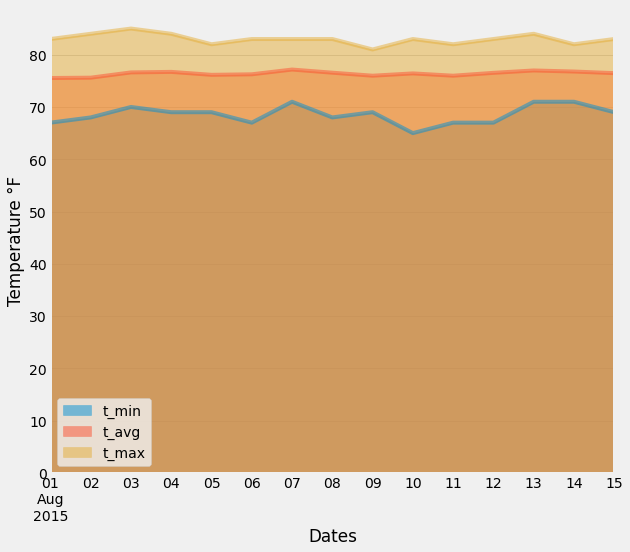

In [43]:
# Plot the daily normals as an area plot with `stacked=False`
trip_normal_df.plot(kind="area", stacked=False, figsize=(9, 8))
plt.title=("Temperature Records for Ideal Trip Dates")
plt.xlabel("Dates")
plt.ylabel("Temperature °F")
plt.savefig("images/trip_dates.png")
plt.show()

## Close Session

In [44]:
# Close Session
session.close()